## Data Preprocessing

### 1. Import Dataset and relevant Python libraries

In [1]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# import required libraries for clustering
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:,.2f}'.format)

In [2]:
# import dataset
df = pd.read_csv('variables.csv')
df.head()

,CUSTOMER_SITE_ID,Recency,Frequency,Num_of_Trxns,Avg_Trxn_Amt,Avg_Margin,Avg_Quantity,Mode_of_Product_Family,Mode_of_Product_Model,Types_of_Product_Family,Types_of_Product_Model,Most_Frequent_Sales_Channel,Most_Frequent_Order_Type,Avg_Price_Index,SHORT_VERTICAL,POSTAL_CODE,CUSTOMER_CLASS,TERRITORY_TYPE,SUPPLIES_SEGMENTATION,SUPPLIES_DECLINE_REASONS,DUNS_NUMBER,Total_SVC_Incidents,Total_Repeat_Calls,Total_FTF_Calls,Most_Frequent_Interaction_Type,Total_Visits,Total_Cases,Num_of_Active_Install_Bases,Total_Contracts,Contract_length,Contract_Category,STRATEGIC_ACCOUNTS,TERRITORY_REGION,Churned_365,Tenure
0,24,24,17.67,4,"3,102.11","2,901.24",12.00,LCM,INK,2,2,Copy,STANDARD DOMESTIC,0.79,GRAPHICS,60085,END USER,Industrial,S,None,144782380,13.00,7.00,6.00,Call,81.00,1.97,5.00,0.00,0.00,No Contract,0,MW,0,77.00
1,90,50,18.86,98,233.90,172.39,11.37,CIJ,MAKE-UP,1,3,EDI,EDI,1.35,CHEMICALS,65802,END USER,Industrial,S,None,43937895,57.00,13.00,44.00,Call,53.00,3.03,6.00,6.00,"1,003.00",FSMA,0,MC,0,"1,879.00"
2,111,415,72.85,21,220.75,188.43,1.05,CIJ,MAKE-UP,1,2,EDI,EDI,1.28,GRAPHICS,56073,END USER,Industrial,S,None,119130057,1.00,0.00,1.00,Call,22.00,3.03,2.00,0.00,0.00,No Contract,0,MW,1,"1,457.00"
3,114,6,11.38,174,145.43,103.28,4.43,CIJ,MAKE-UP,3,4,EDI,EDI,1.25,PHARMA & MEDICAL,92614,END USER,Industrial,M,None,84160407,57.00,14.00,43.00,Call,70.00,1.00,15.00,11.00,521.64,FSMA,0,NW,0,"1,974.00"
4,126,49,61.94,19,835.78,605.25,8.84,TIJ,INK,1,1,EDI,EDI,0.75,PHARMA & MEDICAL,8822,END USER,Industrial,S,Over Stocked / Timing,36781508,1.00,0.00,1.00,Call,13.00,1.00,2.00,0.00,0.00,No Contract,0,NE,0,"1,164.00"


In [3]:
df.shape

(8367, 35)

### 3. Extract FMP variables for clustering

In [4]:
# extract RMFP variables 
cluster_data = df[['Frequency','Avg_Trxn_Amt','Mode_of_Product_Family']]

### 4. Check data skewness

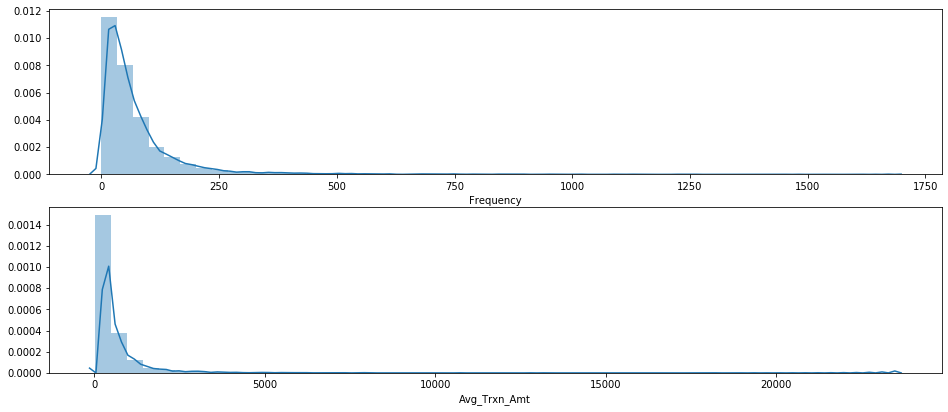

In [5]:
### check data skewness

# Plot RFM distributions
plt.figure(figsize=(16,14))

# Plot distribution of F
plt.subplot(4, 1, 2); sns.distplot(cluster_data['Frequency'])
# Plot distribution of M
plt.subplot(4, 1, 3); sns.distplot(cluster_data['Avg_Trxn_Amt'])

# Show the plot
plt.show()

In [6]:
# apply log transformation
cluster_data['Avg_Trxn_Amt'] = np.log(cluster_data['Avg_Trxn_Amt'] + 0.0000000000000001)
cluster_data['Frequency'] = np.log(cluster_data['Frequency'] + 0.0000000000000001)

/Users/shui/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shui/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### 5. Get dummy variables for Products field and save to the data frame


In [7]:
cluster_data = pd.get_dummies(cluster_data,columns = ['Mode_of_Product_Family'])

In [8]:
cluster_data.head()

,Frequency,Avg_Trxn_Amt,Mode_of_Product_Family_BINARY ARRAY,Mode_of_Product_Family_CIJ,Mode_of_Product_Family_GRAPHICS,Mode_of_Product_Family_GRAPHICS BA,Mode_of_Product_Family_LASER,Mode_of_Product_Family_LCM,Mode_of_Product_Family_LPA,Mode_of_Product_Family_RAW MATERIAL,Mode_of_Product_Family_TIJ,Mode_of_Product_Family_TTO
0,2.87,8.04,0,0,0,0,0,1,0,0,0,0
1,2.94,5.45,0,1,0,0,0,0,0,0,0,0
2,4.29,5.40,0,1,0,0,0,0,0,0,0,0
3,2.43,4.98,0,1,0,0,0,0,0,0,0,0
4,4.13,6.73,0,0,0,0,0,0,0,0,1,0


### 6. Conduct PCA to reduce data dimensions


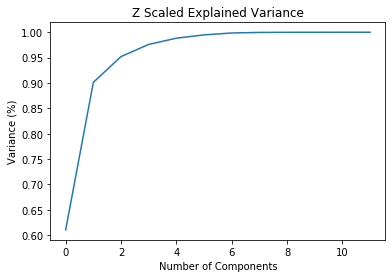

In [9]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(cluster_data)

#Plotting the Cumulative Summation of the Explained Variance

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Z Scaled Explained Variance')
plt.show()

- choose 3 components

In [10]:
components = 3
pca = PCA(n_components = components)
pca_arr = pca.fit_transform(cluster_data)

In [11]:
# Saving the PCA values in a dataframe
cols_PCA = ['PCA'+str(i) for i in range(1,components+1)]
pca_df = pd.DataFrame(pca_arr, columns = cols_PCA)

In [12]:
pca_df.head()

,PCA1,PCA2,PCA3
0,0.58,2.43,0.46
1,0.73,-0.33,-0.10
2,-0.61,-0.48,-0.19
3,1.25,-0.76,0.06
4,-0.60,1.06,0.42


## Clustering Model Fitting


### 7. Choose optimal number of  k

Text(0.5, 0, 'k')

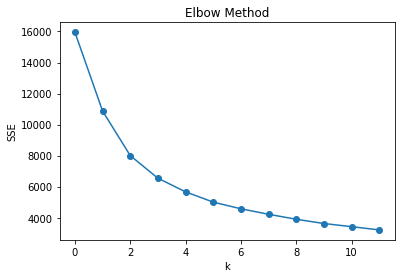

In [13]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11,12,13]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(pca_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd, marker = 'o')
plt.title('Elbow Method')
plt.ylabel('SSE')
plt.xlabel('k')
#plt.savefig('elbow_method.png')

In [14]:
# Silhouette analysis
total_cluster = []
silhouette_list = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(pca_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    total_cluster.append(num_clusters)
    silhouette_list.append(silhouette_avg)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.37663706432534816
For n_clusters=3, the silhouette score is 0.3465127565360991
For n_clusters=4, the silhouette score is 0.368326816470208
For n_clusters=5, the silhouette score is 0.3471132983114668
For n_clusters=6, the silhouette score is 0.3119614984149661
For n_clusters=7, the silhouette score is 0.318973892952047
For n_clusters=8, the silhouette score is 0.31094783537270193


In [15]:
cluster_df = pd.DataFrame(list(zip(total_cluster, silhouette_list)))
cluster_df.columns=['n_clusters','silhouetter_score']
cluster_df = cluster_df[cluster_df['n_clusters'] > 2]
best_cluster = cluster_df.loc[cluster_df['silhouetter_score'] ==cluster_df['silhouetter_score'].max(), 'n_clusters']
best_cluster = best_cluster.iloc[0]

### 9. Fit model 

In [16]:
# k-means model fitting and setting parameter

kmeans = KMeans(n_clusters=best_cluster, max_iter=50)
kmeans.fit(pca_df)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### 10. Assign K means label to original dataset

In [17]:
# assigning cluster labels to the original dataset
kmeans_labels = kmeans.labels_
df['Cluster_Id'] = kmeans_labels

In [18]:
df.head()

,CUSTOMER_SITE_ID,Recency,Frequency,Num_of_Trxns,Avg_Trxn_Amt,Avg_Margin,Avg_Quantity,Mode_of_Product_Family,Mode_of_Product_Model,Types_of_Product_Family,Types_of_Product_Model,Most_Frequent_Sales_Channel,Most_Frequent_Order_Type,Avg_Price_Index,SHORT_VERTICAL,POSTAL_CODE,CUSTOMER_CLASS,TERRITORY_TYPE,SUPPLIES_SEGMENTATION,SUPPLIES_DECLINE_REASONS,DUNS_NUMBER,Total_SVC_Incidents,Total_Repeat_Calls,Total_FTF_Calls,Most_Frequent_Interaction_Type,Total_Visits,Total_Cases,Num_of_Active_Install_Bases,Total_Contracts,Contract_length,Contract_Category,STRATEGIC_ACCOUNTS,TERRITORY_REGION,Churned_365,Tenure,Cluster_Id
0,24,24,17.67,4,"3,102.11","2,901.24",12.00,LCM,INK,2,2,Copy,STANDARD DOMESTIC,0.79,GRAPHICS,60085,END USER,Industrial,S,None,144782380,13.00,7.00,6.00,Call,81.00,1.97,5.00,0.00,0.00,No Contract,0,MW,0,77.00,3
1,90,50,18.86,98,233.90,172.39,11.37,CIJ,MAKE-UP,1,3,EDI,EDI,1.35,CHEMICALS,65802,END USER,Industrial,S,None,43937895,57.00,13.00,44.00,Call,53.00,3.03,6.00,6.00,"1,003.00",FSMA,0,MC,0,"1,879.00",3
2,111,415,72.85,21,220.75,188.43,1.05,CIJ,MAKE-UP,1,2,EDI,EDI,1.28,GRAPHICS,56073,END USER,Industrial,S,None,119130057,1.00,0.00,1.00,Call,22.00,3.03,2.00,0.00,0.00,No Contract,0,MW,1,"1,457.00",1
3,114,6,11.38,174,145.43,103.28,4.43,CIJ,MAKE-UP,3,4,EDI,EDI,1.25,PHARMA & MEDICAL,92614,END USER,Industrial,M,None,84160407,57.00,14.00,43.00,Call,70.00,1.00,15.00,11.00,521.64,FSMA,0,NW,0,"1,974.00",3
4,126,49,61.94,19,835.78,605.25,8.84,TIJ,INK,1,1,EDI,EDI,0.75,PHARMA & MEDICAL,8822,END USER,Industrial,S,Over Stocked / Timing,36781508,1.00,0.00,1.00,Call,13.00,1.00,2.00,0.00,0.00,No Contract,0,NE,0,"1,164.00",2


## Clustering Results

In [19]:
# check number of customers in each cluster
df['Cluster_Id'].value_counts()

1    3634
3    2736
2    1506
0     491
Name: Cluster_Id, dtype: int64

In [20]:
# check cluster summary statistics
df.groupby(['Cluster_Id']).agg({
    'Recency': ['mean'],
    'Frequency': ['mean'],
    'Tenure':['mean'],
    'Avg_Trxn_Amt': ['mean']}).round(2)

,Recency,Frequency,Tenure,Avg_Trxn_Amt
,mean,mean,mean,mean
Cluster_Id,,,,
0,942.27,0.91,104.53,234.44
1,329.18,92.51,"1,303.54",196.66
2,339.32,156.60,"1,264.82","1,329.22"
3,208.02,20.89,"1,474.89",639.02


In [21]:
df.groupby('Cluster_Id') \
  .apply(lambda x: pd.Series({
      'Total_Monetary_Value' : (x['Avg_Trxn_Amt'] * x['Num_of_Trxns']).sum(),
      'Total_Trxn_Amt_for_each_customer' : (x['Avg_Trxn_Amt'] * x['Num_of_Trxns']).mean()
  }))

,Total_Monetary_Value,Total_Trxn_Amt_for_each_customer
Cluster_Id,,
0,"5,057,829.32","10,301.08"
1,"14,887,143.74","4,096.63"
2,"49,394,695.28","32,798.60"
3,"205,970,111.28","75,281.47"


In [22]:
df['Churned_365'].sum()/len(df)

0.26532807457870206

In [23]:
df.groupby('Cluster_Id')['Churned_365'].mean()

Cluster_Id
0   0.72
1   0.26
2   0.29
3   0.17
Name: Churned_365, dtype: float64

In [24]:
df.head()

,CUSTOMER_SITE_ID,Recency,Frequency,Num_of_Trxns,Avg_Trxn_Amt,Avg_Margin,Avg_Quantity,Mode_of_Product_Family,Mode_of_Product_Model,Types_of_Product_Family,Types_of_Product_Model,Most_Frequent_Sales_Channel,Most_Frequent_Order_Type,Avg_Price_Index,SHORT_VERTICAL,POSTAL_CODE,CUSTOMER_CLASS,TERRITORY_TYPE,SUPPLIES_SEGMENTATION,SUPPLIES_DECLINE_REASONS,DUNS_NUMBER,Total_SVC_Incidents,Total_Repeat_Calls,Total_FTF_Calls,Most_Frequent_Interaction_Type,Total_Visits,Total_Cases,Num_of_Active_Install_Bases,Total_Contracts,Contract_length,Contract_Category,STRATEGIC_ACCOUNTS,TERRITORY_REGION,Churned_365,Tenure,Cluster_Id
0,24,24,17.67,4,"3,102.11","2,901.24",12.00,LCM,INK,2,2,Copy,STANDARD DOMESTIC,0.79,GRAPHICS,60085,END USER,Industrial,S,None,144782380,13.00,7.00,6.00,Call,81.00,1.97,5.00,0.00,0.00,No Contract,0,MW,0,77.00,3
1,90,50,18.86,98,233.90,172.39,11.37,CIJ,MAKE-UP,1,3,EDI,EDI,1.35,CHEMICALS,65802,END USER,Industrial,S,None,43937895,57.00,13.00,44.00,Call,53.00,3.03,6.00,6.00,"1,003.00",FSMA,0,MC,0,"1,879.00",3
2,111,415,72.85,21,220.75,188.43,1.05,CIJ,MAKE-UP,1,2,EDI,EDI,1.28,GRAPHICS,56073,END USER,Industrial,S,None,119130057,1.00,0.00,1.00,Call,22.00,3.03,2.00,0.00,0.00,No Contract,0,MW,1,"1,457.00",1
3,114,6,11.38,174,145.43,103.28,4.43,CIJ,MAKE-UP,3,4,EDI,EDI,1.25,PHARMA & MEDICAL,92614,END USER,Industrial,M,None,84160407,57.00,14.00,43.00,Call,70.00,1.00,15.00,11.00,521.64,FSMA,0,NW,0,"1,974.00",3
4,126,49,61.94,19,835.78,605.25,8.84,TIJ,INK,1,1,EDI,EDI,0.75,PHARMA & MEDICAL,8822,END USER,Industrial,S,Over Stocked / Timing,36781508,1.00,0.00,1.00,Call,13.00,1.00,2.00,0.00,0.00,No Contract,0,NE,0,"1,164.00",2


In [25]:
# moving churn to last
temp = df['Churned_365']
df.drop('Churned_365',axis =1, inplace = True)
df['Churned_365'] = temp

### 11. Exporting result to csv

In [26]:
df.to_csv('cluster_result.csv')